In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb

In [5]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
PATHDATASET = '../dataset/'

In [7]:

print('Importing data...')
data = pd.read_csv(PATHDATASET+'application_train.csv')
test = pd.read_csv(PATHDATASET+'application_test.csv')
prev = pd.read_csv(PATHDATASET+'previous_application.csv')
buro = pd.read_csv(PATHDATASET+'bureau.csv')
buro_balance = pd.read_csv(PATHDATASET+'bureau_balance.csv')
credit_card  = pd.read_csv(PATHDATASET+'credit_card_balance.csv')
POS_CASH  = pd.read_csv(PATHDATASET+'POS_CASH_balance.csv')
payments = pd.read_csv(PATHDATASET+'installments_payments.csv')
lgbm_submission = pd.read_csv(PATHDATASET+'sample_submission.csv')

#Separate target variable
# y = data['TARGET']
# del data['TARGET']

Importing data...


In [10]:
data.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  

[2 rows x 122 columns]

Occupation Type

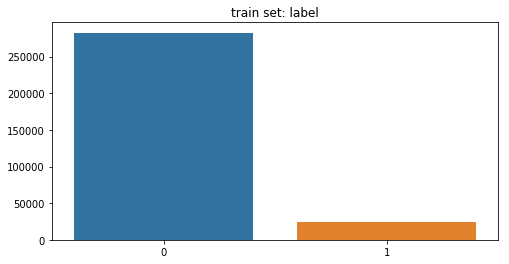

In [8]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title=''):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()
plot_categorical(data=data, col='TARGET', size=[8 ,4], xlabel_angle=0, title='train set: label')

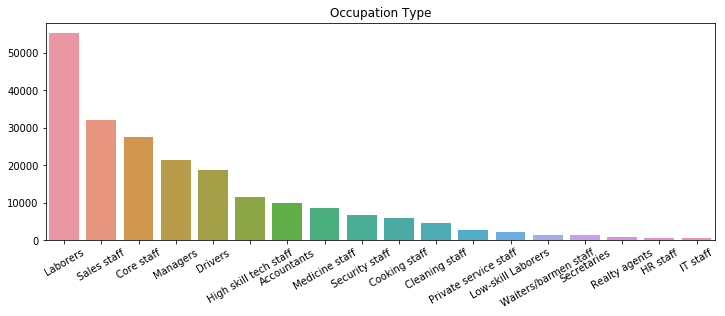

In [9]:
plot_categorical(data=data, col='OCCUPATION_TYPE', size=[12 ,4], xlabel_angle=30, title='Occupation Type')

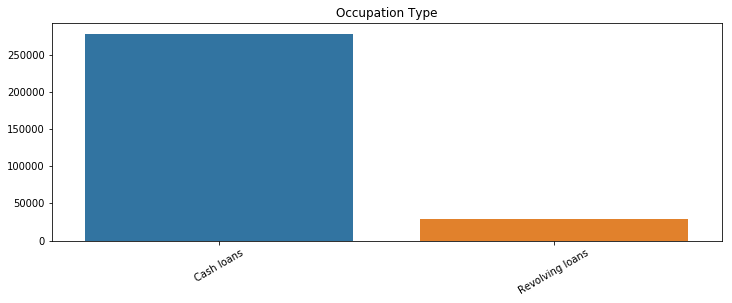

In [9]:
plot_categorical(data=data, col='NAME_CONTRACT_TYPE', size=[12 ,4], xlabel_angle=30, title='Occupation Type')